<a href="https://colab.research.google.com/github/MathewsJosh/Resmat/blob/main/%5BMAC015%5D_Trabalho_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes da Equipe:

Matheus Casarim<br>
Mathews Edwirds<br>
Gustavo Morais<br>
Nykolas Catalão<br>

O guindaste de lança da figura é projetado para uma capacidade
máxima de 10 kN e sua viga uniforme de seção transversal em formato de I tem
uma massa de 200 kg.

(a) Trace a magnitude da força de reação no pino em A como
uma função de x, dentro da faixa de operação de x = 0,2m a x = 3,8m. Plote também os gráficos para as componentes x e y desta reação. Interprete os gráficos.

(b) Determine o valor mínimo de R e o valor correspondente
de x. Explique.

(c) Para qual valor de R o pino em A deve ser projetado? Explique. (Use g =10 m/s^2).

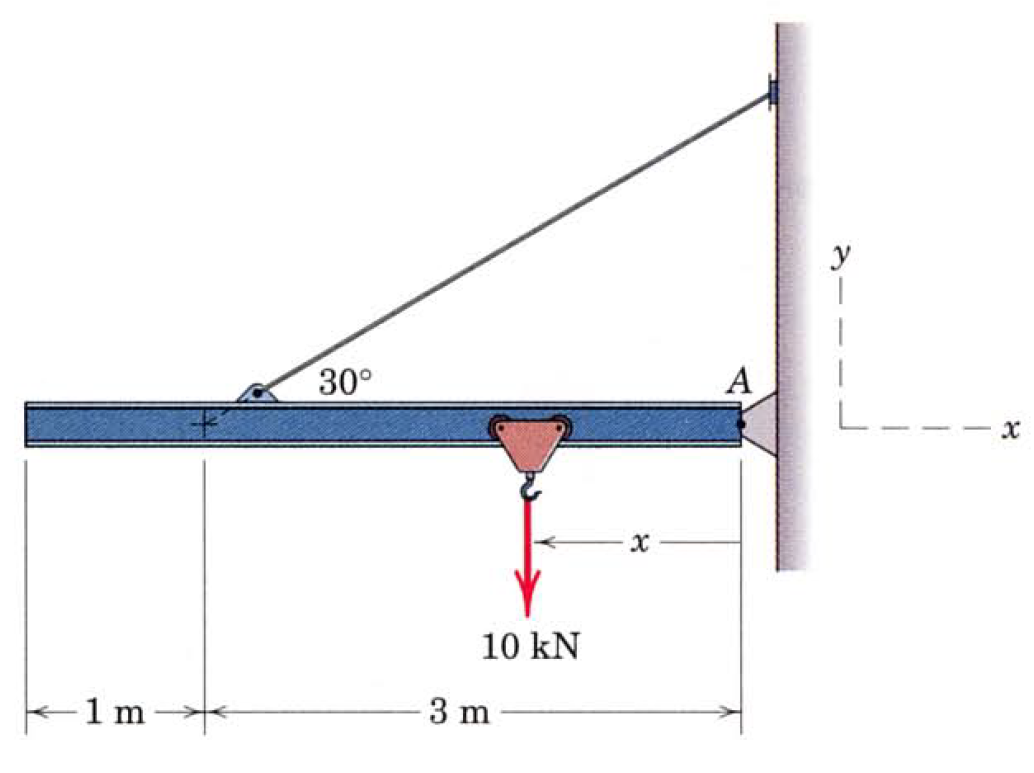

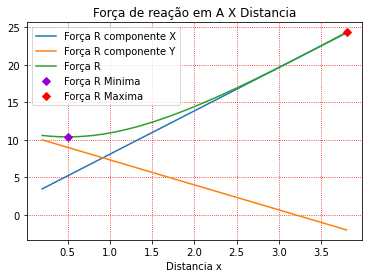

Distancia maxima: 3.800000000000002 Força R maxima: 24.331050121192895
Distancia minima: 0.5 Força R minima: 10.392304845413264


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = [0.2]
tx = []
ty = []
t = []
rx = []
ry = []
r = []
rMin = 100
xMin = 0.2
rMax = 0
xMax = 0.2
i = 0

while ( x[i] < 3.8 ):
    #calculando forças de apoio
    #equaçao de equilibrio
    #equilibrio de momento no ponto A: -T*sen30*3 + 2*2 + 10*x = 0
    aux1 = ( ( (10 * x[i]) + (2 * 2 ) ) / ( 3 * math.sin( math.radians(30) ) ) )
    t.append( aux1 )
    #componente x de T: Tx = T*cos30
    aux2 = t[i] * math.cos( math.radians(30) )
    tx.append( aux2 )
    #componente y de T: Ty = T*sin30
    aux3 = t[i] * math.sin( math.radians(30) )
    ty.append( aux3 )
    #equilibrio de forças no eixo X: Tx - Rx = 0
    aux4 = tx[i]
    rx.append( aux4 )
    #equilibrio de forças no eixo Y: Ty -10 -2 + Ry = 0
    aux5 = -ty[i] + 10 + 2
    ry.append( aux5 )
    #calculando força de apoio A: R = sqrt( Rx**2 + Ry**2)
    aux4 = math.sqrt( ( rx[i] ** 2 )  + ( ry[i] ** 2 ) )
    r.append( aux4 )
    if(aux4 > rMax):
        rMax = aux4
        xMax = x[i]
    if(aux4 <= rMin):
        rMin = aux4
        xMin = x[i]
    x.append( x[i] + 0.1)
    i = i + 1

#calculando forças de apoio na ultima iteração
#equaçao de equilibrio
#equilibrio de momento no ponto A: -T*sen30*3 + 2*2 + 10*x = 0
aux1 = ( ( (10 * x[i]) + (2 * 2 ) ) / ( 3 * math.sin( math.radians(30) ) ) )
t.append( aux1 )
#componente x de T: Tx = T*cos30
aux2 = t[i] * math.cos( math.radians(30) )
tx.append( aux2 )
#componente y de T: Ty = T*sin30
aux3 = t[i] * math.sin( math.radians(30) )
ty.append( aux3 )
#equilibrio de forças no eixo X: Tx - Rx = 0
aux4 = tx[i]
rx.append( aux4 )
#equilibrio de forças no eixo Y: Ty -10 -2 + Ry = 0
aux5 = -ty[i] + 10 + 2
ry.append( aux5 )
#calculando força de apoio A: R = sqrt( Rx**2 + Ry**2)
aux4 = math.sqrt( ( rx[i] ** 2 )  + ( ry[i] ** 2 ) )
r.append( aux4 )
if(aux4 > rMax):
    rMax = aux4
    xMax = x[i]
if(aux4 <= rMin):
    rMin = aux4
    xMin = x[i]

plt.title('Força de reação em A X Distancia')
plt.plot(x, rx, '-', label='Força R componente X')
plt.plot(x, ry, '-', label='Força R componente Y')
plt.plot(x, r, '-', label='Força R')
plt.plot(xMin, rMin, 'D', label='Força R Minima', color='darkviolet')
plt.plot(xMax, rMax, 'D', label='Força R Maxima', color='red')
plt.xlabel('Distancia x')
plt.grid(color='r', linestyle='dotted')
plt.legend()
plt.show()
print('Distancia maxima:', xMax, 'Força R maxima:', rMax)
print('Distancia minima:', xMin, 'Força R minima:', rMin)

# Resultados explicados


a) O guindaste, ao se afastar do ponto A, passa a gerar um momento cada vez maior, para conservar o equilibrio, ocorre um aumento da força T no cabo. O aumento da força T causa um aumento na componente X da reação de apoio em A, pois para que o equilibrio em X ocorra, a equação Tx - Rx = 0 deve ser atendida. Já em Y, o aumento de T faz com que a componente Ry diminua, pois Ty + Ry - PesoViga - PesoGuindaste = 0, e o peso da viga e do guindaste são constantes. Podemos notar também que, com o afastamento do guindaste e o aumento da força T, a reação de apoio diminui a sua componente Y e aumenta sua componente X, fazendo com que a reação de apoio se aproxime da sua componente X.


b) Para que a força R seja mínima, deve-se encontrar os valores de R a partir da sua norma R = sqrt(Rx² + Ry²) e ir comparando estes resultados com o valor calculado para o equilibrio das forças em x (aux4) a cada ponto. No nosso caso, a força R minima é 10.3923N.

Já para calcularmos a posição correspondente no eixo X, basta calcular o módulo da diferença do vetor resultante pelo valor mínimo que estamos buscando, essa operação retornará o index que representa o valor mínimo dessa subtração. Para nosso caso, esse valor de x é 0.5m.

In [ ]:
# Codigo da b)
# Buscando o index da força resultante minima
def index_mais_proximo(array, value):     
  array = np.asarray(array) # converte a lista em um np.array (facilita o uso dos dados com a biblioteca numpy)
  idx = (np.abs(array - value)).argmin() # Calc o módulo da diferença do array pelo valor passado no parâmetro, retornando o index mínimo
  return idx
    
j = index_mais_proximo(r,rMin)
print("Força R Mínima calculada anteriormente: ", rMin)
print("Posição j no eixo x para o ponto de força R Mínima: ", x[j])
print("Força R no ponto {}: {}".format(x[j], r[j]))

Força R Mínima calculada anteriormente:  10.392304845413264
Posição j no eixo x para o ponto de força R Mínima:  0.5
Força R no ponto 0.5: 10.392304845413264


c) O pino deverá ser projetado para o valor máximo da reação de apoio, ou seja, R = 24,33 kN, já que o pino deve aguentar a viga e o guindaste, pra qualquer posição que o guindaste estiver na viga, seja na posição inicial ou na posição final. 